In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot
from itertools import combinations


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
data_dir = "../data/iris_complexity_measure"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats(include_hof_metadata=True)

In [5]:
x_col = 'Complexity Measure'
df[x_col] = df['complexity_measure/_name']

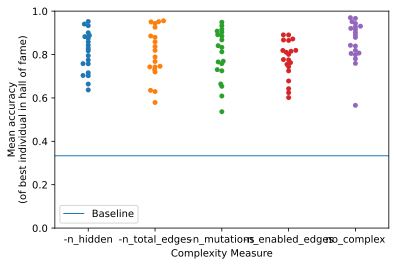

In [6]:
accuracy_swarmplot(data=df, x=x_col)

In [7]:
selectors = dict(
    n_hidden=df[x_col] == '-n_hidden',
    n_total_edges=df[x_col] == '-n_total_edges',
    n_enabled_edges=df[x_col] == '-n_enabled_edges',
    n_mutations=df[x_col] == '-n_mutations',
    no_complex=df[x_col] == 'no_complex',
)

for a,b in combinations(selectors.items(), 2):
    ka, va = a
    kb, vb = b
    
    va = df[va]['MAX:accuracy.mean']
    vb = df[vb]['MAX:accuracy.mean']
    print (f"{ka} vs {kb} : best mean accuracy - {va.mean()} vs. {vb.mean()}")
    from scipy.stats import ttest_ind
    t, p = ttest_ind(va, vb, equal_var=False)
    print (t, p)
    print()
    
for k,v in selectors.items():
    v = df[v]['MAX:accuracy.mean']
    print (f"{k} - {v.mean():.2f} \pm {v.std():.2f}")

n_hidden vs n_total_edges : best mean accuracy - 0.8113133333333333 vs. 0.80443
0.20669133553848815 0.8373957851896261

n_hidden vs n_enabled_edges : best mean accuracy - 0.8113133333333333 vs. 0.7767566666666667
1.2028694201583476 0.23651934533538993

n_hidden vs n_mutations : best mean accuracy - 0.8113133333333333 vs. 0.7975966666666665
0.40838855060449225 0.6853789449159513

n_hidden vs no_complex : best mean accuracy - 0.8113133333333333 vs. 0.8607733333333334
-1.6460170646448997 0.1080084281226561

n_total_edges vs n_enabled_edges : best mean accuracy - 0.80443 vs. 0.7767566666666667
0.8579770241682021 0.3966820850760304

n_total_edges vs n_mutations : best mean accuracy - 0.80443 vs. 0.7975966666666665
0.18645624035745453 0.8530790588068315

n_total_edges vs no_complex : best mean accuracy - 0.80443 vs. 0.8607733333333334
-1.6851575988460714 0.10043297959478162

n_enabled_edges vs n_mutations : best mean accuracy - 0.7767566666666667 vs. 0.7975966666666665
-0.6402819875550231 0.

<ipython-input-8-221abb09dfcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x_col][df[x_col] == k] = v


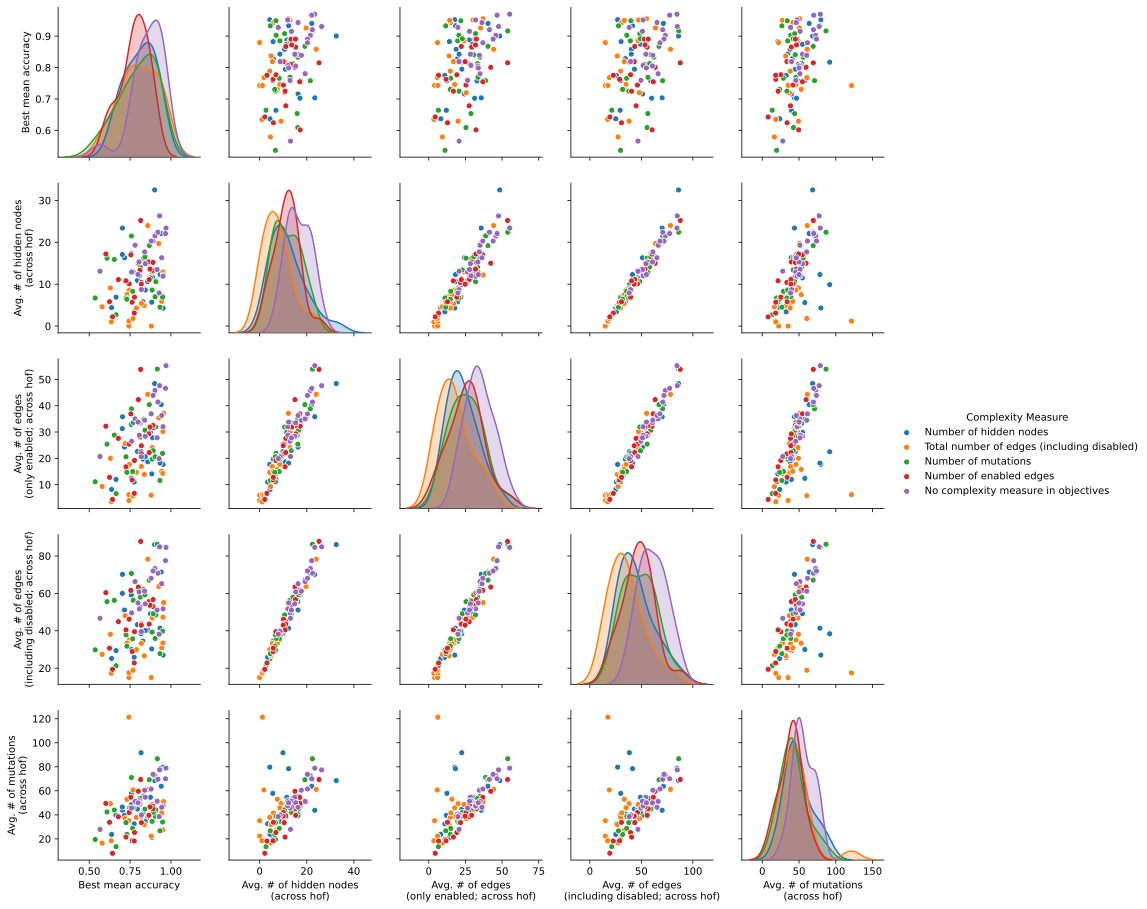

In [8]:
measures = {
    '-n_hidden': 'Number of hidden nodes',
    '-n_total_edges': 'Total number of edges (including disabled)',
    '-n_enabled_edges': 'Number of enabled edges',
    '-n_mutations': 'Number of mutations',
    'no_complex': 'No complexity measure in objectives'
}

for k, v in measures.items():
    df[x_col][df[x_col] == k] = v

columns = {
    'MAX:accuracy.mean': 'Best mean accuracy',
    'MEAN:n_hidden': 'Avg. # of hidden nodes\n(across hof)',
    'MEAN:n_enabled_edges': 'Avg. # of edges\n(only enabled; across hof)',
    'MEAN:n_total_edges': 'Avg. # of edges\n(including disabled; across hof)',
    'MEAN:n_mutations': 'Avg. # of mutations\n(across hof)',
}

for a, b in columns.items():
    df[b] = df[a]

g = sns.pairplot(df, hue=x_col, vars=columns.values())
plt.show()

In [9]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 5% chance of             |
|                                                    | being enabled)                       |
+----------------------------------------------------+------